In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

In [2]:
with open('data/events/events_England.json') as f:
    data = json.load(f)

data_df = pd.DataFrame(data)

In [3]:
data_df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [5]:
shots = data_df[data_df['subEventName']=='Shot']
shots = shots.assign(Goal = 0)

In [6]:
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==101:
                shots.at[i,'Goal']=1

In [7]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Goal
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,1
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,0
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,1
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,0
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,0


In [30]:
half = '2H'
isgoal = 0

In [31]:
if isgoal:
    the_shots = shots[np.logical_and((shots['matchPeriod']==half), (shots['Goal']==1))]['eventSec']
else:
    the_shots = shots[(shots['matchPeriod']==half)]['eventSec']

In [32]:
the_shots

979        231.514689
1008       340.664542
1099       594.425584
1107       634.312236
1147       824.618849
             ...     
642945    1972.969422
643023    2193.887080
643051    2377.197700
643055    2381.481625
643149    2834.127168
Name: eventSec, Length: 4497, dtype: float64

In [33]:
total_first_half_shots = len(the_shots)
number_of_matches = len(np.unique(shots['matchId']))
first_half_shots_per_match = total_first_half_shots/number_of_matches
first_half_shots_per_min = total_first_half_shots/48

In [34]:
first_half_shots_per_min

93.6875

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54

In [36]:
matplotlib.font_manager.FontProperties(family='Helvetica',size=11)

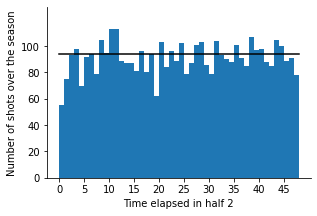

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Plot histogram of shots (minutes)
plt.hist(the_shots/60, bins = range(0,49))
plt.plot([0, 48],[first_half_shots_per_min, first_half_shots_per_min], color='black')
 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,48,5))
ax.set_xlabel('Time elapsed in ' + 'half ' + half[0])
if isgoal==0:
    ax.set_ylabel('Number of shots over the season')
    ax.set_yticks(np.arange(0,120,20))
    ax.set_ylim(0,130) 
else:
    ax.set_ylabel('Number of goals over the season')
    ax.set_yticks(np.arange(0,20,2))
    ax.set_ylim(0,20) 
    
plt.show()  

In [38]:
#Save the figure to a pdf
if isgoal:
    fig.savefig('output/TimesOfGoals' + half +'.pdf' , dpi=None, bbox_inches="tight")
else:
    fig.savefig('output/TimesOfShots' + half +'.pdf' , dpi=None, bbox_inches="tight")